In [6]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm as cmplt

import sys
sys.path.insert(0, '../../opticalforces')

from beam import ScalarFrozenWave
from particle import SphericalParticle

fig_num = 0

In [7]:
L = 5e-3

def batman_func(z):
    ls = [l for l in (-7.03, -3, -1.05, -0.7, -0.48, 0.48, 0.7, 1.05, 3, 7.03)]
    
    l1, l2, l3, l4, l5, l6, l7, l8, l9, l10 = ls

    z = -z*20/L if z > 0 else z*20/L
                
    if (l1 <= z and z <= l2):
        return -0.0025*z**4 - 0.0106*z**3 + 0.0442*z**2 + 0.4838*z + 3.7131
    elif l2 <= z and z <= l3:
        return 0.0892*z**4 + 0.1116*z**3 - 0.5099*z**2 - 0.6137*z + 1.2631
    elif l3 <= z and z <= l4:
        return 4.8*z + 6.36
    elif l4 <= z and z <= l5:
        return -3.1818*z + 0.7727
    elif l5 <= z and z <= l6:
        return 2.3
    else:
        return 0
        
vfw = ScalarFrozenWave(centered=True)
vfw.name = 'lip-const'
vfw.vacuum_wavelength = 632e-9
vfw.medium_refractive_index = 1
vfw.N = 55
vfw.L = L
vfw.Q = 0.99*vfw.wavenumber
vfw.reference_function = batman_func

print(vfw)

/usr/local/lib/python3.5/dist-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


name: lip-const
    _amplitude: 1
    _phase: 0
    _vacuum_wavelength: 6.32e-07
    _vacuum_wavenumber: 9941748.903765168
    _medium_refractive_index: 1
    _wavelength: 6.32e-07
    _wavenumber: 9941748.903765168
    _Q: 9842331.414727516
    _N: 55
    _L: 0.005
    _bessel_order: 0
    _reference_function: batman_func

beam 1 (-55): scalar-bessel-beam
    _amplitude: (0.0022364243883743425+0j)
    _phase: 0
    _longitudinal_wavenumber: 9773216.37634854
    _transversal_wavenumber: 1822803.5896905144
    _bessel_spot: 1.31930042891e-06
    _axicon_angle: 0.18439150061071108
    _axicon_angle_degree: 10.564854763077687
    _bessel_order: 0

beam 2 (-54): scalar-bessel-beam
    _amplitude: (0.002086175466741654+0j)
    _phase: 0
    _longitudinal_wavenumber: 9774473.013409978
    _transversal_wavenumber: 1816053.0211521867
    _bessel_spot: 1.32420448615e-06
    _axicon_angle: 0.18370082376032984
    _axicon_angle_degree: 10.525281894543454
    _bessel_order: 0

beam 3 (-53): scalar

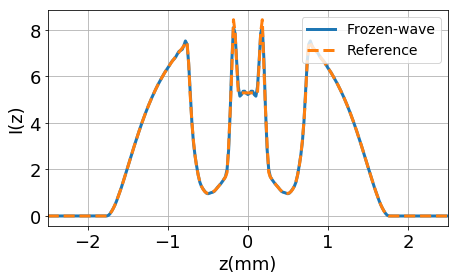

In [8]:
z = np.linspace(-L/2, L/2, 251)

fig_num += 1
plt.figure(fig_num, figsize=(4*1.618, 4))

plt.plot([z*1e3 for z in z], [vfw.intensity(0, 0, z) for z in z], lw=3, label='Frozen-wave')
plt.plot([z*1e3 for z in z], [vfw.reference_function(z)**2 for z in z], '--', lw=3, label='Reference')
plt.legend(fontsize=12, loc=1)
plt.xlim([-L/2*1e3, L/2*1e3])
plt.legend(fontsize=14, loc=1)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.xlabel(r'z(mm)', fontsize=18)
plt.ylabel('I(z)', fontsize=18)
plt.grid()
plt.tight_layout()
plt.savefig('perfil-2D.png',  dpi=300)
plt.show()

### 3D plot

In [9]:
rho_max = 50e-6
z_max = L/2

rho = np.linspace(-rho_max, rho_max, 251)
z = np.linspace(-z_max, z_max, 251)
RHO, Z = np.meshgrid(rho, z)

vinty = np.vectorize(lambda rho, z: vfw.intensity(rho, 0, z, 'cylindrical'))

INTY = vinty(RHO, Z)

RHO = [rho*1e6 for rho in RHO]
Z = [z*1e3 for z in Z]

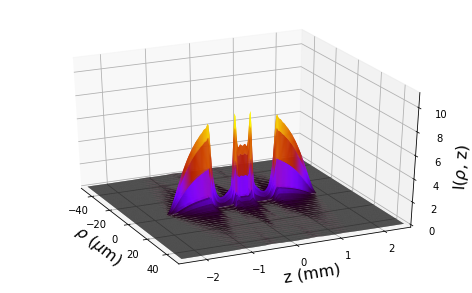

In [10]:
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))
ax = plt.gca(projection='3d')

# https://matplotlib.org/examples/color/colormaps_reference.html
ax.plot_surface(RHO, Z, INTY, rcount=1000, ccount=1000, alpha=1, cmap=cmplt.gnuplot)
#cset = ax.contourf(RHO, Z, INTY, zdir='z', offset=0, cmap=cmplt.coolwarm)
#cset = ax.contourf(RHO, Z, INTY, zdir='x', offset=-Rmax, cmap=cmplt.coolwarm)
#cset = ax.contourf(RHO, Z, INTY, zdir='y', offset=Zmax, cmap=cmplt.coolwarm)

ax.set_xlabel(r'$\rho$ ($\mu$m)', fontsize=16)
ax.set_xlim(-rho_max*1e6, rho_max*1e6)
ax.set_ylabel(r'z (mm)', fontsize=16)
ax.set_ylim(-z_max*1e3, z_max*1e3)
ax.set_zlabel(r'I($\rho$, z)', fontsize=16)
ax.set_zlim(0, 11)

ax.view_init(elev=30, azim=-25)

plt.savefig('perfil-3D.png',  dpi=300)
plt.show()